# Analyzing Monte Carlo Simulations

## Single Run Analysis

       net1          iout     idump      i_in         ilout    ildump  \
0  0.186675 -2.352476e-09  0.000002  0.000002 -8.482104e-13  0.000002   
1  0.186670  1.999040e-08  0.000002  0.000002  2.315894e-08  0.000002   
2  0.186603  2.699846e-08  0.000002  0.000002  3.042947e-08  0.000002   
3  0.186600  4.160870e-08  0.000002  0.000002  4.559665e-08  0.000002   
4  0.186660  6.140035e-08  0.000002  0.000002  6.616395e-08  0.000002   

         vg  bit          diff  
0  0.996574    0           NaN  
1  0.996574    1  2.234287e-08  
2  0.996574    2  7.008062e-09  
3  0.996574    3  1.461025e-08  
4  0.996574    4  1.979165e-08  
       net1          iout     idump      i_in         ilout    ildump  \
0  0.186675  6.151168e-10  0.000002  0.000002 -8.490986e-13  0.000002   
1  0.186670  2.298079e-08  0.000002  0.000002  2.315894e-08  0.000002   
2  0.186603  2.999612e-08  0.000002  0.000002  3.042947e-08  0.000002   
3  0.186600  4.462172e-08  0.000002  0.000002  4.559664e-08  0.000002  

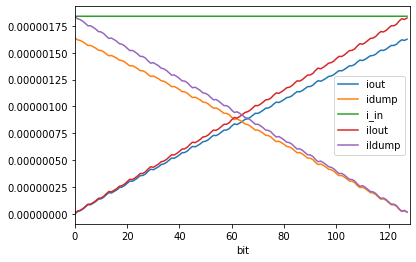

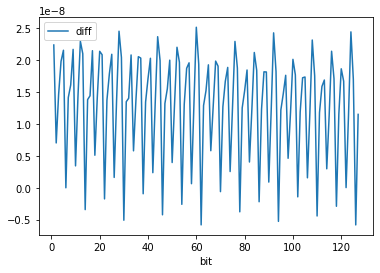

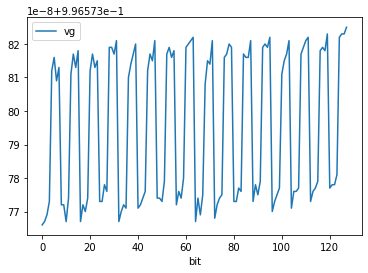

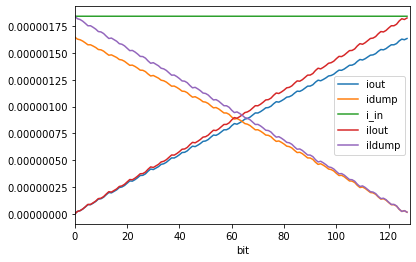

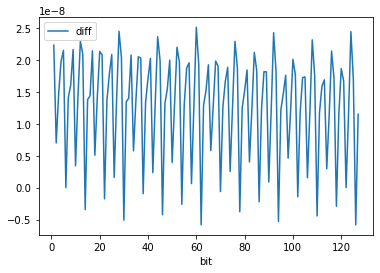

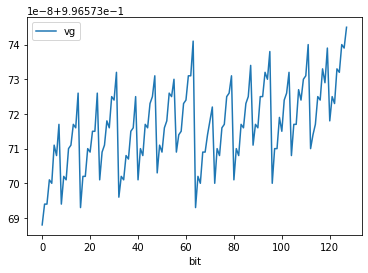

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


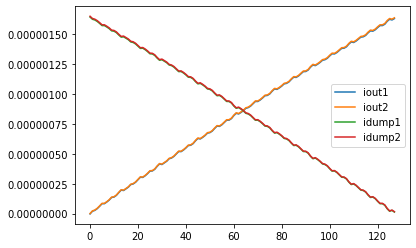

In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# load data
data = pd.read_csv("data/mc_dac11.txt", sep=" +", engine='python')
data.columns = ["net1", "iout", "idump", "i_in", "ilout", "ildump", "vg"]
data["bit"] = data.index

# load data 2
data2 = pd.read_csv("data/mc_dac21.txt", sep=" +", engine='python')
data2.columns = ["net1", "iout", "idump", "i_in", "ilout", "ildump", "vg"]
data2["bit"] = data2.index


#generate current steps
data["diff"] = data["iout"].diff(1)
data2["diff"] = data2["iout"].diff(1)
# print sample of dataframe
print(data.head())
print(data2.head())

data.plot("bit", ["iout", "idump", "i_in", "ilout", "ildump"], xlim=(0,128))
plt.show()
data.plot("bit", "diff")
plt.show()
data.plot("bit", "vg")
plt.show()

data2.plot("bit", ["iout", "idump", "i_in", "ilout", "ildump"], xlim=(0,128))
plt.show()
data2.plot("bit", "diff")
plt.show()
data2.plot("bit", "vg")
plt.show()

plt.plot(data.bit, data.iout)
plt.plot(data2.bit, data2.iout)
plt.plot(data.bit, data.idump)
plt.plot(data2.bit, data2.idump)
plt.legend(["iout1", "iout2", "idump1", "idump2"])
# plt.ylim(1e-6, 1e-6)
plt.show()

## Multi-Run Analysis

       net1          iout     idump      i_in         ilout    ildump  \
0  0.186675 -2.352476e-09  0.000002  0.000002 -8.482104e-13  0.000002   

      bryce  bit  diff  
0  0.996574    0   0.0  


/home/madvlsi/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


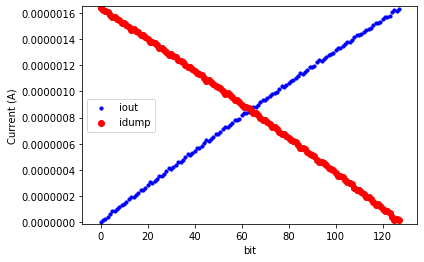

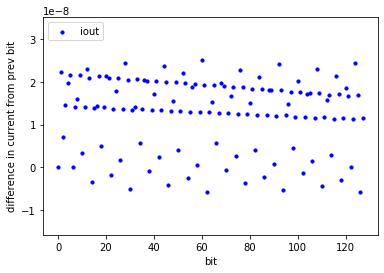

1.99903951e-08


In [14]:
runs = 1
#init data with first run
data = pd.read_csv("data/mc_dac11.txt", sep=" +", engine='python')

#combine multiple runs
for i in range(1, runs):
    data = pd.concat([data, pd.read_csv("data/mc_dac1" + str(i + 1)+".txt", sep=" +", engine='python')])
data.columns = ["net1", "iout", "idump", "i_in", "ilout", "ildump", "bryce"]
data["bit"] = data.index % 128
data["diff"] = data["iout"].diff(1)

#remove diffs at bits = 0
data["diff"].loc[data["bit"] == 0] = 0
print(data.loc[data["bit"] == 0])

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data.bit, data.iout, s=10, c='b', label='iout')
ax1.scatter(data.bit, data.idump, c='r', label='idump')
# ax1.scatter(data.bit, data.i_in, c='g', label='i in')
plt.ylim(data.iout.min()-1e-8, data.idump.max()+1e-8)
# plt.xlim(60,80)
plt.legend(loc='center left');
plt.xlabel("bit")
plt.ylabel("Current (A)")
plt.show()

#plotting diffs
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(data["bit"], data["diff"], s=10, c='b', label='iout')
plt.ylim(data["diff"].min()-1e-8, data["diff"].max()+1e-8)
# plt.xlim(60,80)
plt.legend(loc='upper left');
plt.xlabel("bit")
plt.ylabel("difference in current from prev bit")
plt.show()

#density plot of diff
# data["diff"].plot.density()

print(data["iout"].iloc[1])

### DNL and INL distributions

1.99903951e-08


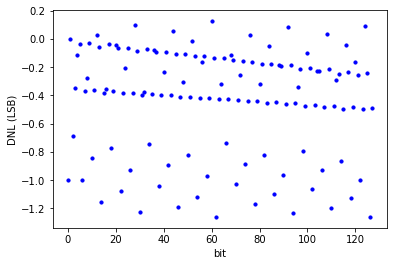

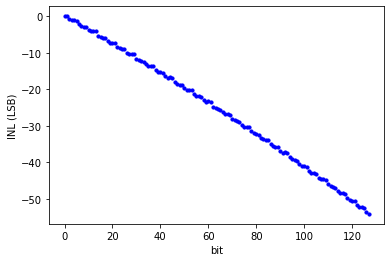

In [15]:
#generate DNL & INL Columns
dnl = []
inl = []
print(data["iout"].iloc[1])
for i in range(128*runs):    
    if i % 128 == 0:
        lsb_current = data["iout"].iloc[i+1] - data["iout"].iloc[i]
        dnl.append(data["diff"].iloc[i] / lsb_current - 1)
        inl.append(0)
    else:
        dnl.append(data["diff"].iloc[i] / lsb_current - 1)
        inl.append(dnl[-1] + inl[-1])
        

        
data["dnl"] = dnl
data["inl"] = inl

# print(dnl)
#DNL
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data.bit, data.dnl, s=10, c='b', label="dnl")
plt.xlabel("bit")
plt.ylabel("DNL (LSB)")
plt.show()

#INL
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(data.bit, data.inl, s=10, c='b', label="inl")
plt.xlabel("bit")
plt.ylabel("INL (LSB)")
plt.show()